In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
#decision tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#knn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#svm
from sklearn.svm import SVC, SVR
#naive bayes

#logistic regression
from sklearn.linear_model import LogisticRegression
#neural network
from sklearn.neural_network import MLPClassifier, MLPRegressor
#xgboost
from sklearn.preprocessing import StandardScaler

#json
import json

#linear regression
from sklearn.linear_model import LinearRegression

# classification_report
from sklearn.metrics import classification_report, confusion_matrix

# dummy classifier
from sklearn.dummy import DummyClassifier

# Regression

## RF without normalization

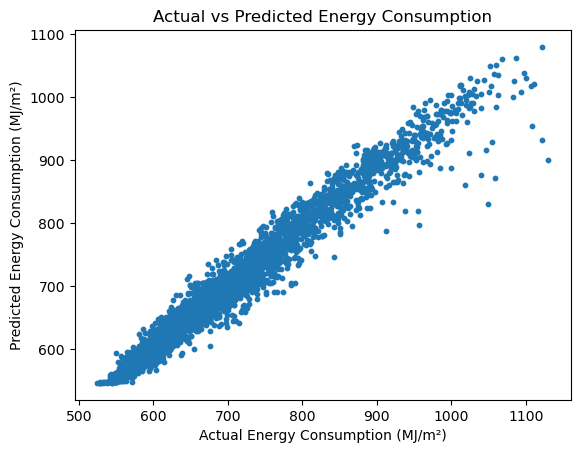

MSE:  466.02076717129677
RMSE:  21.587514149880636
NMSE:  0.04042303961588437


In [26]:
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
regressor.fit(train_set[input_cols], train_set[output_col])

#predict
predictions = regressor.predict(test_set[input_cols])

# Plot scatter graph with smaller points
plt.scatter(test_set[output_col], predictions, s=10)
plt.xlabel('Actual Energy Consumption (MJ/m²)')
plt.ylabel('Predicted Energy Consumption (MJ/m²)')
plt.title('Actual vs Predicted Energy Consumption - RF')
plt.show()

#calculate error
error = np.mean((predictions - test_set[output_col])**2)
print('MSE: ', error)
print('RMSE: ', np.sqrt(error))
naive_pred = np.mean(train_set[output_col])
naive_error = np.mean((naive_pred - test_set[output_col])**2)

nmse = error / naive_error

print('NMSE: ', nmse)



## RF with normalization

/tmp/ipykernel_497330/4158794212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[input_cols] = scaler.transform(train_set[input_cols])
/tmp/ipykernel_497330/4158794212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set[input_cols] = scaler.transform(test_set[input_cols])


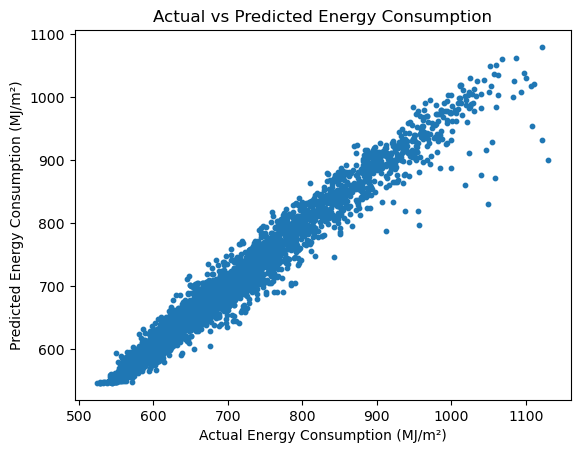

MSE:  465.95634644423467
RMSE:  21.586022015281895
NMSE:  0.04041745170696366


In [27]:
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

scaler = StandardScaler()
scaler.fit(train_set[input_cols])

train_set[input_cols] = scaler.transform(train_set[input_cols])
test_set[input_cols] = scaler.transform(test_set[input_cols])

regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
regressor.fit(train_set[input_cols], train_set[output_col])

#predict
predictions = regressor.predict(test_set[input_cols])

# Plot scatter graph with smaller points
plt.scatter(test_set[output_col], predictions, s=10)
plt.xlabel('Actual Energy Consumption (MJ/m²)')
plt.ylabel('Predicted Energy Consumption (MJ/m²)')
plt.title('Actual vs Predicted Energy Consumption - RF after normalization')
plt.show()

#calculate error
error = np.mean((predictions - test_set[output_col])**2)
print('MSE: ', error)
print('RMSE: ', np.sqrt(error))
      
naive_pred = np.mean(train_set[output_col])
naive_error = np.mean((naive_pred - test_set[output_col])**2)

nmse = error / naive_error

print('NMSE: ', nmse)


## Linear regression

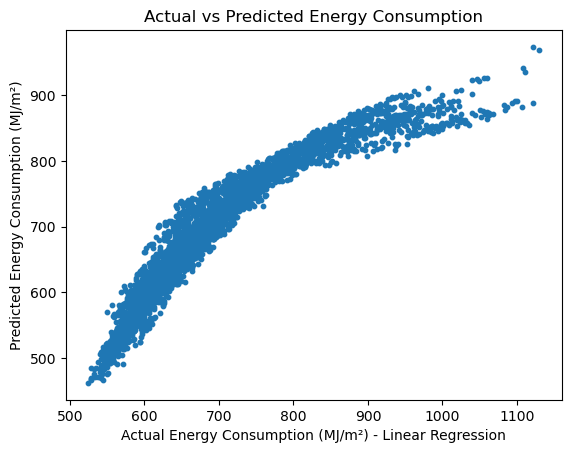

MSE:  1522.6389535310566
RMSE:  39.02100656737415
NMSE:  0.13207500410952847


In [32]:
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

scaler = StandardScaler()
scaler.fit(train_set[input_cols])

train_set[input_cols] = scaler.transform(train_set[input_cols])
test_set[input_cols] = scaler.transform(test_set[input_cols])

regressor = LinearRegression()
regressor.fit(train_set[input_cols], train_set[output_col])

#predict
predictions = regressor.predict(test_set[input_cols])

# Plot scatter graph with smaller points
plt.scatter(test_set[output_col], predictions, s=10)
plt.xlabel('Actual Energy Consumption (MJ/m²)')
plt.ylabel('Predicted Energy Consumption (MJ/m²)')
plt.title('Actual vs Predicted Energy Consumption - Linear Regression')
plt.show()

#calculate error
error = np.mean((predictions - test_set[output_col])**2)
print('MSE: ', error)
print('RMSE: ', np.sqrt(error))
      
naive_pred = np.mean(train_set[output_col])
naive_error = np.mean((naive_pred - test_set[output_col])**2)

nmse = error / naive_error

print('NMSE: ', nmse)



# Classification

In [33]:
with open('./quantiles_dict.json', 'r') as qd:
    quantiles_dict = json.load(qd)

def energy_to_class(energy_consumption, energy_quantiles):
    return next((i for i, q in enumerate(energy_quantiles) if energy_consumption <= q), len(energy_quantiles))

## Random Forest

In [46]:
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'

#replace target label with class
data[output_col] = data[output_col].apply(lambda x: energy_to_class(x, quantiles_dict['energy']))

test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifier.fit(train_set[input_cols], train_set[output_col])

#predict
predictions = classifier.predict(test_set[input_cols])

#classification report 
print(classification_report(test_set[output_col], predictions))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       855
           1       0.67      0.74      0.70       818
           2       0.68      0.68      0.68       860
           3       0.75      0.75      0.75       788
           4       0.93      0.91      0.92       839

    accuracy                           0.79      4160
   macro avg       0.79      0.79      0.79      4160
weighted avg       0.79      0.79      0.79      4160



 ## Decision Tree

In [ ]:
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'

#replace target label with class
data[output_col] = data[output_col].apply(lambda x: energy_to_class(x, quantiles_dict['energy']))

test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(train_set[input_cols], train_set[output_col])

#predict
predictions = classifier.predict(test_set[input_cols])

#classification report 
print(classification_report(test_set[output_col], predictions))

## Dummy classifier 

In [47]:
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'

#replace target label with class
data[output_col] = data[output_col].apply(lambda x: energy_to_class(x, quantiles_dict['energy']))

test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

# dummy classifier
classifier = DummyClassifier(strategy="uniform", random_state=0)
classifier.fit(train_set[input_cols], train_set[output_col])

#predict
naive_predictions = classifier.predict(test_set[input_cols])

#classification report 
print(classification_report(test_set[output_col], naive_predictions))


              precision    recall  f1-score   support

           0       0.22      0.22      0.22       855
           1       0.20      0.20      0.20       818
           2       0.22      0.21      0.21       860
           3       0.18      0.19      0.18       788
           4       0.21      0.20      0.20       839

    accuracy                           0.20      4160
   macro avg       0.20      0.20      0.20      4160
weighted avg       0.20      0.20      0.20      4160



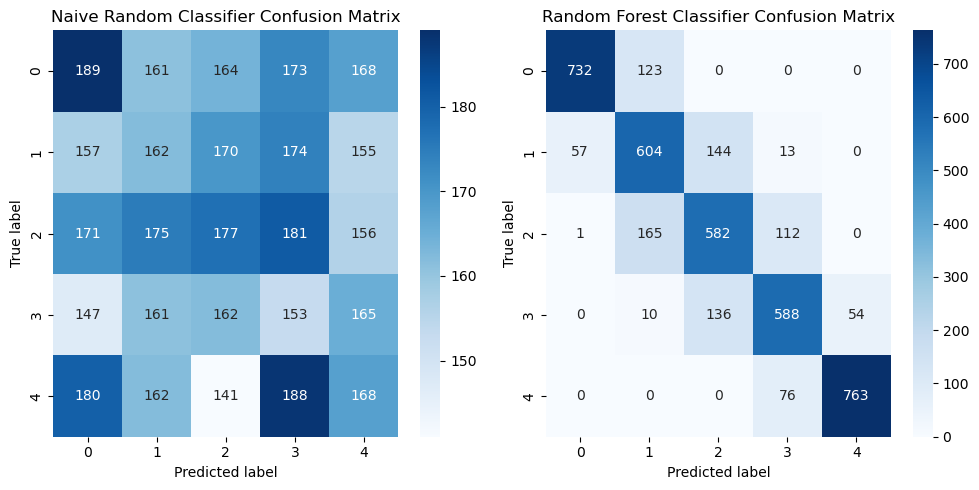

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for naive classifier
naive_cm = confusion_matrix(test_set[output_col], naive_predictions)

# Calculate confusion matrix for random forest classifier
rf_cm = confusion_matrix(test_set[output_col], predictions)

# Plot confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.heatmap(naive_cm, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title("Naive Random Classifier Confusion Matrix")
ax1.set_xlabel("Predicted label")
ax1.set_ylabel("True label")

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=ax2)
ax2.set_title("Random Forest Classifier Confusion Matrix")
ax2.set_xlabel("Predicted label")
ax2.set_ylabel("True label")

plt.tight_layout()
plt.show()


In [50]:
print('Random Forest Classifier')
print(classification_report(test_set[output_col], predictions))
print('Naive Random Classifier')
print(classification_report(test_set[output_col], naive_predictions))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       855
           1       0.67      0.74      0.70       818
           2       0.68      0.68      0.68       860
           3       0.75      0.75      0.75       788
           4       0.93      0.91      0.92       839

    accuracy                           0.79      4160
   macro avg       0.79      0.79      0.79      4160
weighted avg       0.79      0.79      0.79      4160

Naive Random Classifier
              precision    recall  f1-score   support

           0       0.22      0.22      0.22       855
           1       0.20      0.20      0.20       818
           2       0.22      0.21      0.21       860
           3       0.18      0.19      0.18       788
           4       0.21      0.20      0.20       839

    accuracy                           0.20      4160
   macro avg       0.20      0.20      0.20      4160
weighted avg       0.20     

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('./data/data.csv')
input_cols = ['room_amount', 'window_amount', 'surface', 'window_opening_area_north_m2', 'window_opening_area_east_m2', 'window_opening_area_south_m2', 'window_opening_area_west_m2']
output_col = 'total_site_energy_consumption_per_surface_MJm2'

# Replace target label with class
data[output_col] = data[output_col].apply(lambda x: energy_to_class(x, quantiles_dict['energy']))

# Split the data into training and testing sets
test_set = data[:int(len(data)*0.2)]
train_set = data[int(len(data)*0.2):]

# Define the list of classifiers to test
classifiers = [
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression(),
    MLPClassifier()
]

# Loop over classifiers
confusion_matrices = []
accuracies = []
for classifier in classifiers:
    # Train the classifier
    scaler = StandardScaler()
    train_set_scaled = scaler.fit_transform(train_set[input_cols])
    test_set_scaled = scaler.transform(test_set[input_cols])
    classifier.fit(train_set_scaled, train_set[output_col])

    # Make predictions
    predictions = classifier.predict(test_set_scaled)

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(test_set[output_col], predictions)
    cm = confusion_matrix(test_set[output_col], predictions)

    # Add accuracy and confusion matrix to lists
    accuracies.append(accuracy)
    confusion_matrices.append(cm)

# Plot confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
ax = axes.ravel()
for i in range(len(classifiers)):
    sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues", ax=ax[i])
    ax[i].set_title(type(classifiers[i]).__name__)
    ax[i].set_xlabel("Predicted label")
    ax[i].set_ylabel("True label")
plt.tight_layout()
plt.show()

# Plot accuracies as histogram
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar([type(c).__name__ for c in classifiers], accuracies)
ax.set_title("Accuracy Comparison")
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


TypeError: 'numpy.ndarray' object is not callable